**ЛАБОРАТОРНАЯ РАБОТА №6**

Пермяков Дмитрий

ИУ5-83Б

Вариант №13

**Задание 1.**

$K$ программистов могут писать программы для выполнения на одном из $M$
 серверов, при этом программа не попадает сразу на сервер, а обрабатывается на одном из $N$ специальных компьютеров, которые проверяют отсутствие вирусов. Интенсивность работы программистов $\lambda$
, интенсивность работы компьютеров-антивирусов $\nu$, интенсивность работы основных серверов $\mu$, программа оказывается с вирусом с вероятностью $p$. Если программа с вирусом, она получает отказ обслуживания на основных серверах. Для компьютеров по проверке вирусов имеется ограничение по длине очереди $m_1$, для основных серверов ограничение по длине очереди $m_2$. Для компьютеров по проверке вирусов имеется ограничение по длине очереди.

- Нарисовать граф состояний системы, учитывая количество программистов, которые пишут программу, количество программ на компьютерах-антивирусах, количество программ на серверах;
- Написать уравнения Колмогорова для вероятностей состояний, финальных вероятностей;
- Тремя способами (экспериментально, методом укрупнения состояний, по уравнениям Колмогорова) найти основные характеристики эффективности СМО: среднее время пребывания заявки в системе, абсолютную пропускную способность, среднее число заявок в системе.

In [ ]:
Variant<-13+777
set.seed(Variant)
K<-sample(c(3:6),1)
M<-sample(c(1:3),1)
N<-sample(c(1:3),1)
lambda<-runif(1)
mu<-runif(1)
nu<-runif(1)
p<-runif(1)
m1<-sample(c(1:2),1)
m2<-sample(c(1:2),1)
View(data.frame(K,M,N,lambda,mu,nu,p,m1,m2))

K,M,N,lambda,mu,nu,p,m1,m2
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
4,2,1,0.8193687,0.2689319,0.4190684,0.6485978,1,2


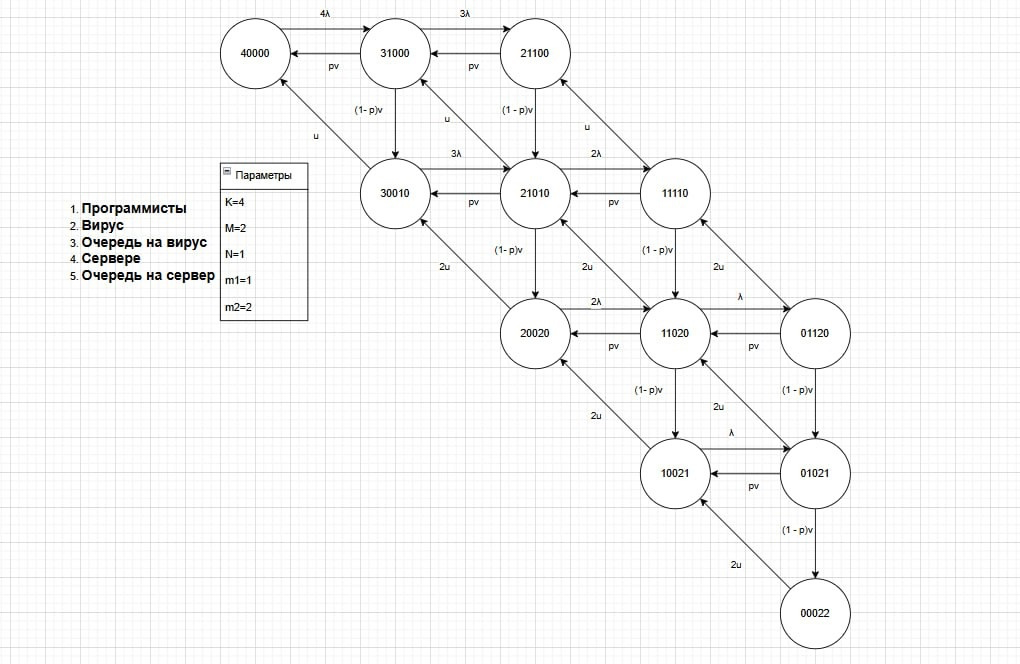

Запишем уравнения Колмогорова:


\lambda
\nu      - v
\mu      - u

$$
\frac{dP_{40000}(t)}{dt} = -4 \lambda P_{40000}(t) + p \nu P_{31000}(t) + \mu P_{30010}(t) \\
\frac{dP_{31000}(t)}{dt} = -P_{31000}(t) (\nu + 3 \lambda) + \mu P_{21010}(t) + p \nu P_{21100}(t) + 4 \lambda P_{40000}(t) \\
\frac{dP_{21100}(t)}{dt} = - \nu P_{21100}(t) + 3 \lambda P_{31000}(t) + \mu P_{11110}(t) \\
\frac{dP_{30010}(t)}{dt} = -P_{30010}(t) (\mu + 3 \lambda) + (1 - p) \nu P_{31000} + p \nu P_{21010} + 2 \mu P_{20020}(t) \\
\frac{dP_{21010}(t)}{dt} = -P_{21010}(t) (\mu + 2 \lambda + \nu) + p \nu P_{11110}(t) + 2 \mu P_{11020} \\
\frac{dP_{11110}(t)}{dt} = -P_{11110}(t) (\mu + \nu) + 2 \lambda P_{21010}(t) + 2 \mu P_{01120}(t) \\
\frac{dP_{20020}(t)}{dt} = -2 P_{20020}(t) (\mu + \lambda) + (1-p)\nu P_{21010}(t) + p \nu P_{11020}(t) + 2 \mu P_{10021}(t) \\
\frac{dP_{11020}(t)}{dt} = -P_{11020}(t) (2\mu + \lambda + \nu) + (1-p)\nu P_{11110} + 2 \mu P_{01021} \\
\frac{dP_{01120}(t)}{dt} = -P_{01120}(t) (2\mu + \nu) + \lambda P_{11020}(t) \\
\frac{dP_{10021}(t)}{dt} = -P_{10021}(t) (2\mu + \lambda) + (1-p)\nu P_{11020} (t) + p \nu P_{01021}(t) + 2\mu P_{00022}(t) \\
\frac{dP_{01021}(t)}{dt} = -P_{01021}(t) (2\mu + \nu) + \lambda P_{10021}(t) + (1-p)\nu P_{01120}(t) \\
\frac{dP_{00022}(t)}{dt} = -2\mu P_{00022}(t) + (1-p)\nu P_{01021}(t)
$$



Решим уравнения в maxima, заменив последнее уравнение, уравнением нормировки:

```
λ:0.38778 $
μ:0.5103884$
ν:0.366148$
p:0.2179308$

solve([
-4*λ*P40000 + p*ν*P31000 + μ*P30010 = 0,
-ν*P31000 - 3*λ*P31000 + μ*P21010 + p*ν*P21100 + 4*λ*P40000 = 0,
-ν*P21100 + 3*λ*P31000 + μ*P11110 = 0,
-(μ + 3*λ)*P30010 + (1 - p)*ν*P31000 + p*ν*P21010 + 2*μ*P20020 = 0,
-(μ + 2*λ + ν)*P21010 + p*ν*P11110 + 2*μ*P11020 = 0,
-(μ + ν)*P11110 + 2*λ*P21010 + 2*μ*P01120 = 0,
-2*(μ + λ)*P20020 + (1 - p)*ν*P21010 + p*ν*P11020 + 2*μ*P10021 = 0,
-(2*μ + λ + ν)*P11020 + (1 - p)*ν*P11110 + 2*μ*P01021 = 0,
-(2*μ + ν)*P01120 + λ*P11020 = 0,
-(2*μ + λ)*P10021 + (1 - p)*ν*P11020 + p*ν*P01021 + 2*μ*P00022 = 0,
-(2*μ + ν)*P01021 + λ*P10021 + (1 - p)*ν*P01120 = 0,
P40000 + P31000 + P21100 + P30010 + P21010 + P11110 + P20020 + P11020 + P01120 + P10021 + P01021 + P00022  = 1
],
[P40000, P31000, P21100, P30010, P21010, P11110, P20020, P11020, P01120, P10021, P01021, P00022]);
float(%);
```

```
P40000=0.02656490435130511,
P31000=0.04435377454812708,
P21100=0.18542996245816462,
P30010=0.07379898966109096,
P21010=0.023191830481635728,
P11110=0.031929193162136736,
P20020=0.10675010914868494,
P11020=0.0350393465297007,
P01120=0.009796895835511295,
P10021=0.17861116695408308,
P01021=0.05196187244913365,
P00022=0.2325719544204261
```

In [ ]:
P40000 <- 0.02656490435130511
P31000 <- 0.04435377454812708
P21100 <- 0.18542996245816462
P30010 <- 0.07379898966109096
P21010 <- 0.023191830481635728
P11110 <- 0.031929193162136736
P20020 <- 0.10675010914868494
P11020 <- 0.0350393465297007
P01120 <- 0.009796895835511295
P10021 <- 0.17861116695408308
P01021 <- 0.05196187244913365
P00022 <- 0.2325719544204261

P40000 + P31000 + P21100 + P30010 + P21010 + P11110 + P20020 + P11020 + P01120 + P10021 + P01021 + P00022

[1] 1

С помощью полученных финальных вероятностей найдём характеристики эффективности системы.  
Cреднее число заявок в системе:

In [ ]:
Lsys <- 1*(P31000 + P30010) + 2*(P21100 + P21010 + P20020) + 3*(P11110 + P11020 + P10021) + 4*(P01120 + P01021 + P00022)
Lsys

[1] 2.662959

Абсолютная пропускная способность  

In [ ]:
a <- (P30010 + P21010 + P11110)*mu + (P20020 + P11020 + P01120 + P10021 + P01021 + P00022)*2*mu
a

[1] 0.01485165

Среднее время пребывания заявки в системе  

In [ ]:
# средняя интенсивность суммарного входного потока
LBD = (K - Lsys) * lambda

Tsys = Lsys / LBD
Tsys

[1] 0.829466

# Метод параметров связи

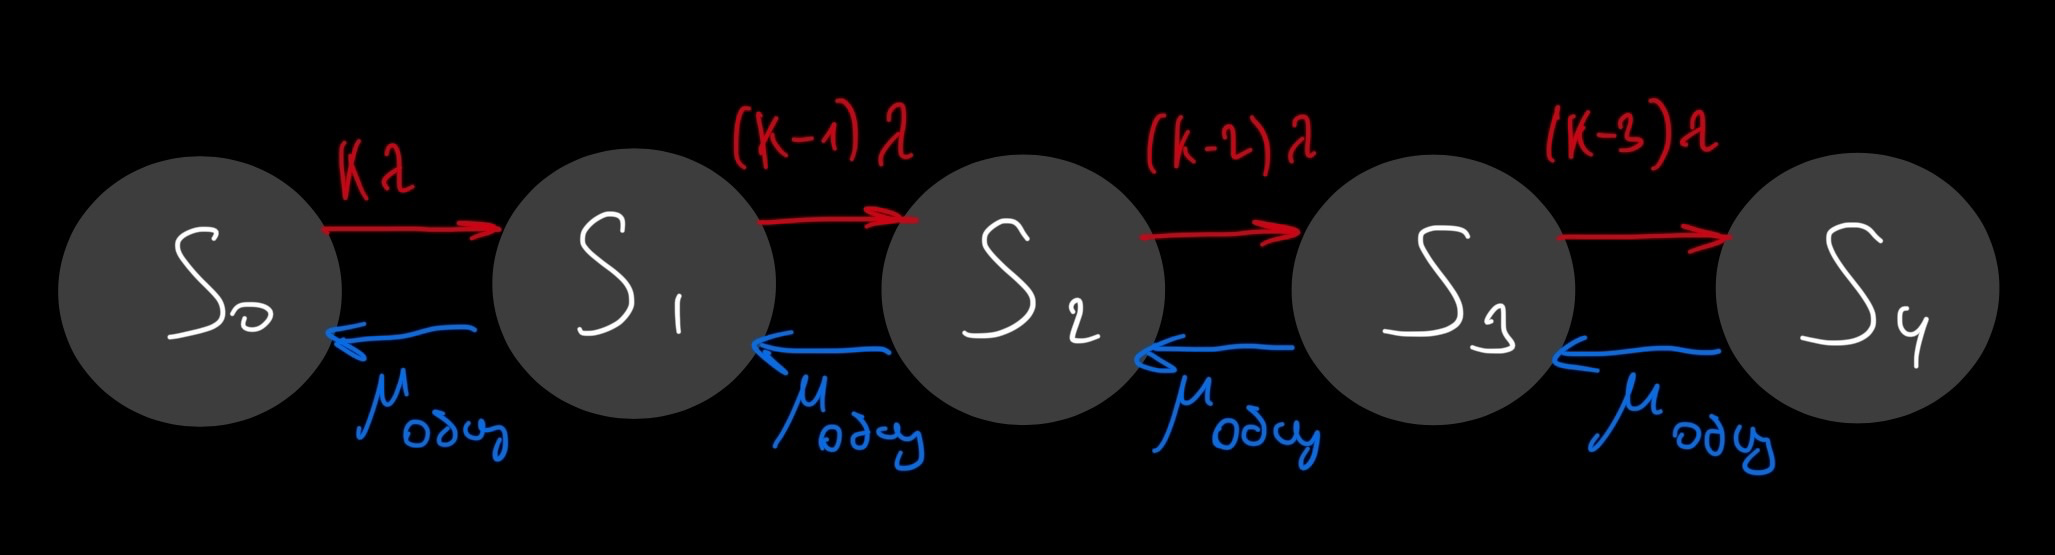

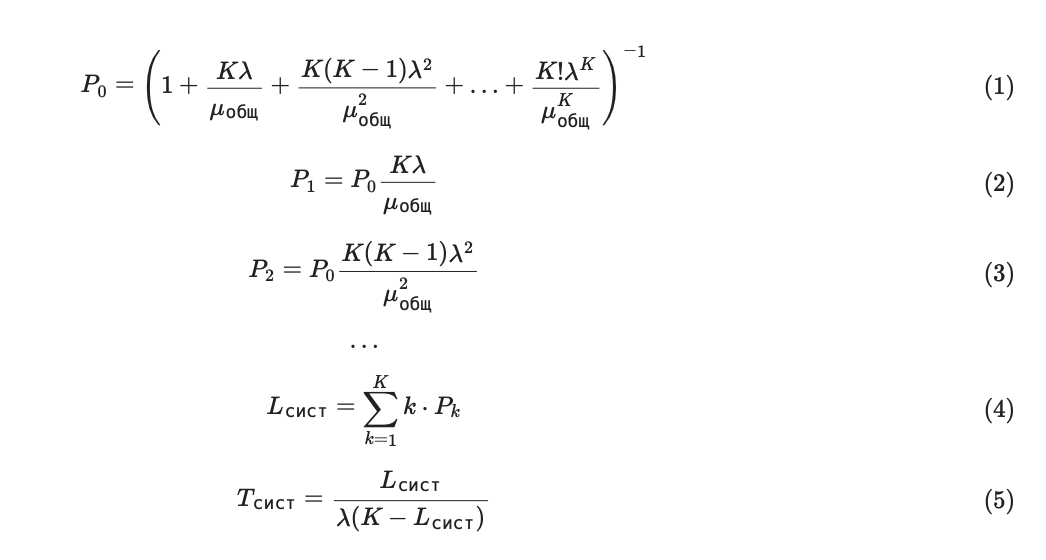

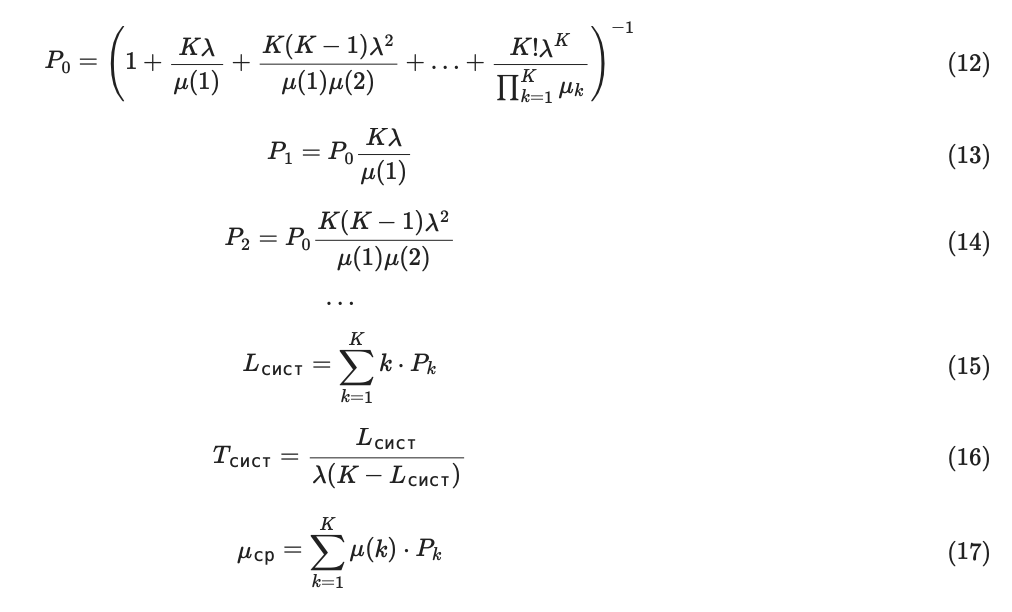

Пусть $\mu_{общ} = 0.5$

In [ ]:
mu_o = 0.5

In [ ]:
sumForP0 <- 0
for(n in 0:K) {
  # Произведение (K*(K-1)*...*(K-n+1)) можно вычислить через факториал
  # но для наглядности сделаем вручную:
  if(n == 0) {
    prod_factor <- 1
  } else {
    prod_factor <- 1
    for(i in 0:(n-1)) {
      prod_factor <- prod_factor * (K - i)
    }
  }
  sumForP0 <- sumForP0 + prod_factor * (lambda / mu_o)^n
}

P0 <- 1 / sumForP0
P0

[1] 0.003139919

In [ ]:
P <- numeric(K+1)  # вектор вероятностей от P0 до PK
for(n in 0:K) {
  if(n == 0) {
    prod_factor <- 1
  } else {
    prod_factor <- 1
    for(i in 0:(n-1)) {
      prod_factor <- prod_factor * (K - i)
    }
  }
  P[n+1] <- P0 * prod_factor * (lambda / mu_o)^n
}
P

[1] 0.003139919 0.020582011 0.101185534 0.331633047 0.543459490

In [ ]:
L_syst_o <- 0
for(n in 0:K) {
  L_syst_o <- L_syst_o + n * P[n+1]
}
L_syst_o

[1] 3.39169

In [ ]:
NU <- c()
for(i in 0:floor(L_syst_o - 1)) {
  NU <- append(NU, (1 - p) * min(N, floor(L_syst_o - i)))
}
NU

[1] 0.3514022 0.3514022 0.3514022

In [ ]:
MU <- c()
for(i in 1:floor(L_syst_o)) {
  MU <- append(MU, mu * min(M, i))
}
MU

[1] 0.2689319 0.5378638 0.5378638

In [ ]:
PI <- c()
PI[1] <- 1 / (1 + NU[1] / MU[1])
PI[2] <- PI[1] * (NU[1] / MU[1])
PI

[1] 0.4335275 0.5664725

In [ ]:
mu_o <- PI[2] * MU[1]
mu_o

[1] 0.1523425

Получили $\mu = 0.152342520513804$

In [ ]:
sumForP0 <- 0
for(n in 0:K) {
  # Произведение (K*(K-1)*...*(K-n+1)) можно вычислить через факториал
  # но для наглядности сделаем вручную:
  if(n == 0) {
    prod_factor <- 1
  } else {
    prod_factor <- 1
    for(i in 0:(n-1)) {
      prod_factor <- prod_factor * (K - i)
    }
  }
  sumForP0 <- sumForP0 + prod_factor * (lambda / mu_o)^n
}

P0 <- 1 / sumForP0
P0

[1] 4.134372e-05

In [ ]:
P <- numeric(K+1)  # вектор вероятностей от P0 до PK
for(n in 0:K) {
  if(n == 0) {
    prod_factor <- 1
  } else {
    prod_factor <- 1
    for(i in 0:(n-1)) {
      prod_factor <- prod_factor * (K - i)
    }
  }
  P[n+1] <- P0 * prod_factor * (lambda / mu_o)^n
}
P

[1] 4.134372e-05 8.894628e-04 1.435183e-02 1.543816e-01 8.303358e-01

In [ ]:
L_syst_o <- 0
for(n in 0:K) {
  L_syst_o <- L_syst_o + n * P[n+1]
}
L_syst_o

[1] 3.814081

In [ ]:
NU <- c()
for(i in 0:floor(L_syst_o - 1)) {
  # (1-p) * min(N, floor(L_syst_o - i)) ...
  NU <- append(NU, (1 - p) * min(N, floor(L_syst_o - i)))
}
NU

[1] 0.3514022 0.3514022 0.3514022

In [ ]:
MU <- c()
for(i in 1:floor(L_syst_o)) {
  MU <- append(MU, mu * min(M, i))
}
MU

[1] 0.2689319 0.5378638 0.5378638

In [ ]:
PI <- c()
if(length(MU) > 0) {
  # Защита на случай, если floor(L_syst_o)=0
  PI[1] <- 1 / (1 + NU[1] / MU[1])
  PI[2] <- PI[1] * (NU[1] / MU[1])
} else {
  PI[1] <- 1
  PI[2] <- 0
}
PI

[1] 0.4335275 0.5664725

In [ ]:
mu_o <- PI[2] * MU[1]
mu_o

[1] 0.1523425

In [ ]:
"среднее число заявок в системе"
L_syst_o

"абсолютная пропускная способность"
mu_o

T_syst_o = L_syst_o / ((K - L_syst_o) * lambda)
"среднее время пребывания заявки в системе"
T_syst_o

[1] "среднее число заявок в системе"

[1] 3.814081

[1] "абсолютная пропускная способность"

[1] 0.1523425

[1] "среднее время пребывания заявки в системе"

[1] 25.03726

Возьмём начальный $\mu_{общ}=\mu$. Прогоним несколько итераций по 2 моделям:

# Метод на основе эквивалентности потоков

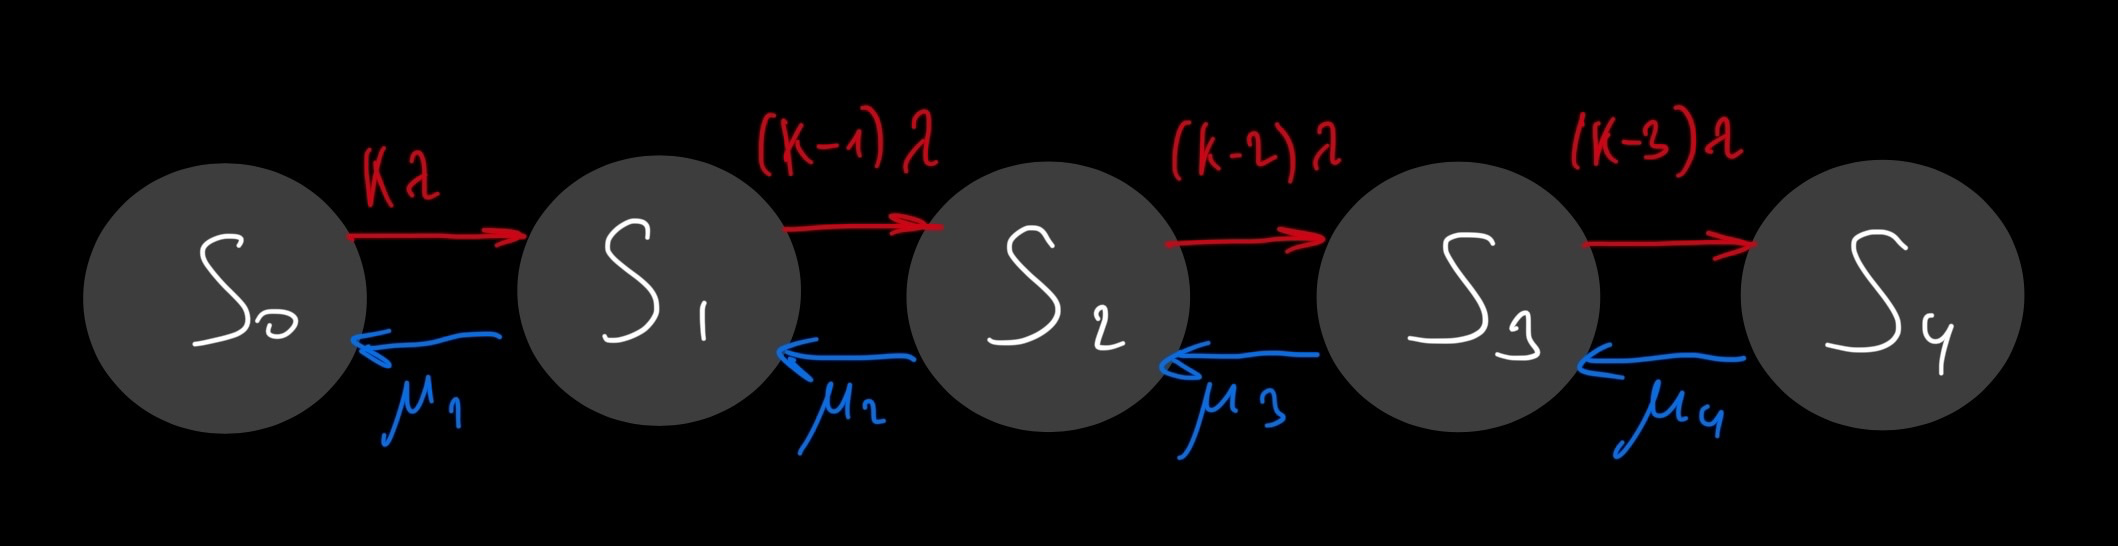

In [ ]:
MU <- c()  # вектор, где MU[u] соответствует состоянию u=1..K

for (u in 1:K) {
  # Собираем NUn: эффективные "скорости" обслуживания антивирусами, учитывая (1 - p) и min(N, (u-n)).
  # Это повторяет идею, что часть заявок "бракуется" (p), а оставшиеся идут на следующие стадии.
  NUn <- c()
  for (n in 0:(u - 1)) {
    # (1-p)*nu — это интенсивность "хороших" заявок, "min(N, u - n)" — учитываем, что не более N заявок проверяются параллельно,
    # и, если заявок осталось (u - n) на антивирус, то обрабатываются min(N, u-n).
    NUn = append(NUn, (1 - p) * nu * min(N, u - n))
  }

  # Собираем MUn: интенсивности обслуживания на серверах, если занято i мест из u (i=1..u)
  MUn <- c()
  for (n in 1:u) {
    # mu * min(M,n): если заявок n, то обслуживаются максимум M серверов
    MUn = append(MUn, mu * min(M, n))
  }

  # Считаем стационарные вероятности PI[i] для "внутренней" цепи (у автора методики это делается через PI_0).
  PI_0 <- 1
  # пробегаем i=1..length(NUn), чтобы набрать сумму для PI_0
  for (i in 1:length(NUn)) {
    # prod(NUn[1:i]) / prod(MUn[1:i]) -- это произведение отношений скоростей
    PI_0 <- PI_0 + prod(NUn[1:i]) / prod(MUn[1:i])
  }
  PI_0 <- 1 / PI_0

  # Сами PI[i]
  PI <- c()
  for (i in 1:length(NUn)) {
    PI = append(PI, PI_0 * prod(NUn[1:i]) / prod(MUn[1:i]))
  }

  # "Эффективная" интенсивность = сумма(MUn * PI)(аналогично тому, как было в исходном коде)
  MU = append(MU, sum(MUn * PI))
}
MU

[1] 0.09515606 0.13425556 0.14378472 0.14631575

In [ ]:
factor_n <- function(n) {
  # Вычислим произведение K*(K-1)*...*(K-n+1)
  # (это называется "falling factorial"), можно через цикл или факториалы
  if (n == 0) return(1)
  ff <- 1
  for (i in 0:(n-1)) {
    ff <- ff * (K - i)
  }
  # А дальше делим lambda^n на произведение MU[1]*...*MU[n]
  # Причём MU[i] – это MU[i], значит для n=3 умножаем MU[1]*MU[2]*MU[3].
  denomMU <- 1
  for (i in 1:n) {
    denomMU <- denomMU * MU[i]
  }
  # Собираем всё вместе:
  return(ff * (lambda^n) / denomMU)
}

In [ ]:
sum_factor <- 0
for (n in 1:K) {
  sum_factor <- sum_factor + factor_n(n)
}
P0 <- 1 / (1 + sum_factor)
P0

[1] 2.078894e-05

In [ ]:
P <- numeric(K + 1)  # P[1] будет для P0, P[2] для P1, ...
P[1] <- P0  # P0

for (n in 1:K) {
  P[n+1] <- P0 * factor_n(n)
}
P

[1] 2.078894e-05 7.160366e-04 1.311003e-02 1.494171e-01 8.367361e-01

In [ ]:
L_syst <- 0
for (n in 0:K) {
  L_syst <- L_syst + n * P[n+1]
}
L_syst

[1] 3.822132

In [ ]:
abs_throughput <- 0
for (n in 1:K) {
  abs_throughput <- abs_throughput + P[n+1] * MU[n]
}
abs_throughput

[1] 0.1457398

In [ ]:
T_syst <- L_syst / abs_throughput
T_syst

[1] 26.22573

In [ ]:
cat("Среднее число заявок в системе =", L_syst, "\n")
cat("Абсолютная пропускная способность =", abs_throughput, "\n")
cat("Среднее время пребывания заявки в системе =", T_syst, "\n")

Среднее число заявок в системе = 3.822132 
Абсолютная пропускная способность = 0.1457398 
Среднее время пребывания заявки в системе = 26.22573 


# Экспериментальная часть

In [ ]:
# переменные для очерди
queue_for_server <- c()
queue_for_computers <- c()

# переменные для задач
tasks_id_for_computers <- rep(0, N)
task_id_for_server <- rep(0, M)
created_tasks <- c()

# переменные для хранения событий
events_for_computers <- c()
events_for_computers_id <- c()
events_for_tasks <- c()
events_for_tasks_id <- c()
events_for_server <- c()
events_for_server_id <- c()

for (i in c(1:K)) {
  created_tasks = c(created_tasks, rexp(1, lambda))
  events_for_tasks <- c(events_for_tasks, created_tasks[i])
  events_for_tasks_id <- c(events_for_tasks_id, i)
}


# число задач в эксперименте
count_tasks <- 1000

# переменные времени
current_time <- 0
time_step <- 0.01

# переменные параметров модели
number_of_task_in_system_in_current_moment <- 0 # сколько заявок успешно завершили выполнение.
number_of_task_in_system_for_each_moment <- c() # сколько заявок в системе на каждом шаге;
times_of_task_in_system <- c() # время пребывания каждой заявки в системе;
number_leave_tasks <- 0

while(length(created_tasks) != count_tasks) {
  i <- 1
  while(i <= length(events_for_tasks)) { # оброботка появление новой задачи в системе
    if (events_for_tasks[i] <= current_time) { # если наступило время появления задачи
      if (length(queue_for_computers) == m1) { # если её некуда поместить, то отмечаем её как вышедшую и создаём событие появление новой
        created_tasks = c(created_tasks, events_for_tasks[i] + rexp(1, lambda))
        events_for_tasks <- c(events_for_tasks, created_tasks[length(created_tasks)])
        events_for_tasks_id <- c(events_for_tasks_id, length(created_tasks))
        times_of_task_in_system <- c(times_of_task_in_system, 0)
      } else { # иначе добавляем её на проверку на вирусы
        number_of_task_in_system_in_current_moment <- number_of_task_in_system_in_current_moment + 1
        found_id <- 0

        for(j in c(1:length(tasks_id_for_computers))) {
          if (tasks_id_for_computers[j] == 0) {
            found_id <- j
            break
          }
        }

        if (found_id != 0) { # если есть свободные компьютеры то отправляем задачу им
          tasks_id_for_computers[found_id] <- events_for_tasks_id[i]

          events_for_computers <- c(events_for_computers, events_for_tasks[i] + rexp(1, nu))
          events_for_computers_id <- c(events_for_computers_id, found_id)
        } else { # иначе отправляем в очередь
          queue_for_computers = c(queue_for_computers, events_for_tasks_id[i])
        }
      }

      events_for_tasks <- events_for_tasks[-i]
      events_for_tasks_id <- events_for_tasks_id[-i]
    } else {
      i <- i + 1
    }
  }

  i <- 1

  while(i <= length(events_for_computers)) { # обработка окончание проверки задачи на вирусы
    if (events_for_computers[i] <= current_time) { # если наступило событие
      random <- runif(1)

      if ((length(queue_for_server) == m2 && random > p) || random <= p) { # если была найдена ошибка или для корректной програмы нету место в серверах, то считаем задачу вышедшей из системы и создаём событие новой задачи
        times_of_task_in_system <- c(times_of_task_in_system, events_for_computers[i] - created_tasks[tasks_id_for_computers[events_for_computers_id[i]]])

        number_of_task_in_system_in_current_moment <- number_of_task_in_system_in_current_moment - 1
        created_tasks = c(created_tasks, events_for_computers[i] + rexp(1, lambda))
        events_for_tasks <- c(events_for_tasks, created_tasks[length(created_tasks)])
        events_for_tasks_id <- c(events_for_tasks_id, length(created_tasks))
      } else {
        if (random > p) {  # если не было ошибки в задаче, то добавляем её на сервер
          found_id <- 0

          for(j in c(1:length(task_id_for_server))) {
            if (task_id_for_server[j] == 0) {
              found_id <- j
              break
            }
          }

          if (found_id != 0) { # если есть свободные сервера то отправляем задачу им
            task_id_for_server[found_id] <- tasks_id_for_computers[events_for_computers_id[i]]
            events_for_server <- c(events_for_server, events_for_computers[i] + rexp(1, mu))
            events_for_server_id <- c(events_for_server_id, found_id)
          } else { # иначе отправляем в очередь
            queue_for_server = c(queue_for_server, tasks_id_for_computers[events_for_computers_id[i]])
          }
        }
      }

      if (length(queue_for_computers) == 0) { #  если больше нет задач, то освобождаем компьютер
        tasks_id_for_computers[events_for_computers_id[i]] <- 0
      } else { #  иначе забираем задачу из очереди
        tasks_id_for_computers[events_for_computers_id[i]] <- queue_for_computers[1]
        queue_for_computers <- queue_for_computers[-1]

        events_for_computers <- c(events_for_computers, events_for_computers[i] + rexp(1, nu))
        events_for_computers_id <- c(events_for_computers_id, events_for_computers_id[i])
      }

      events_for_computers <- events_for_computers[-i]
      events_for_computers_id <- events_for_computers_id[-i]
    } else {
      i <- i + 1
    }
  }

  i <- 1

  while(i <= length(events_for_server)) { # обработка завершения исполнения проверенной задачи на сервере
    if (events_for_server[i] <= current_time) { #  если наступило время события, отмечаем её как выполневшейся и сохраняем время в системе, также создаём событие новой задачи
      times_of_task_in_system <- c(times_of_task_in_system, events_for_server[i] - created_tasks[task_id_for_server[events_for_server_id[i]]])
      number_leave_tasks <- number_leave_tasks + 1
      number_of_task_in_system_in_current_moment <- number_of_task_in_system_in_current_moment - 1

      created_tasks = c(created_tasks, events_for_server[i] + rexp(1, lambda))
      events_for_tasks <- c(events_for_tasks, created_tasks[length(created_tasks)])
      events_for_tasks_id <- c(events_for_tasks_id, length(created_tasks))

      if (length(queue_for_server) == 0) { #  если больше нет задач, то освобождаем сервер
        task_id_for_server[events_for_server_id[i]] = 0
      } else {  #  иначе забираем задачу из очереди
        task_id_for_server[events_for_server_id[i]] <- queue_for_server[1]
        queue_for_server <- queue_for_server[-1]
        events_for_server <- c(events_for_server, events_for_server[i] + rexp(1, mu))
        events_for_server_id <- c(events_for_server_id, events_for_server_id[i])
      }

      events_for_server <- events_for_server[-i]
      events_for_server_id <- events_for_server_id[-i]
    } else {
      i <- i + 1
    }
  }

  number_of_task_in_system_for_each_moment <- c(number_of_task_in_system_for_each_moment, number_of_task_in_system_in_current_moment)
  current_time <- current_time + time_step
}

L_sys_P <- sum(number_of_task_in_system_for_each_moment) / (current_time / time_step)
T_sys_P <- mean(times_of_task_in_system)
A_P <- number_leave_tasks/current_time

cat("Среднее время пребывания заявки в системе:")
T_sys_P
cat("Абсолютная пропускная способность:")
A_P
cat("Среднее число заявок в системе:")
L_sys_P

Среднее время пребывания заявки в системе:

[1] 1.779203

Абсолютная пропускная способность:

[1] 0.1535836

Среднее число заявок в системе:

[1] 2.348044